In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('rainfall in india 1901-2015.csv')
df

,DIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5


In [4]:
df.isnull().sum()

DIVISION     0
YEAR         0
JAN          4
FEB          3
MAR          6
APR          4
MAY          3
JUN          5
JUL          7
AUG          4
SEP          6
OCT          7
NOV         11
DEC         10
ANNUAL      26
Jan-Feb      6
Mar-May      9
Jun-Sep     10
Oct-Dec     13
dtype: int64

In [5]:
import numpy as np

# Replace 0's with NaN for numerical columns
numerical_columns = df.select_dtypes(include=np.number).columns
df[numerical_columns] = df[numerical_columns].replace(0, np.nan)

# Fill missing values with mean for numerical columns
df.fillna(df.mean(), inplace=True)

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Fill missing values with mode for categorical columns
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Now your DataFrame 'df' should have missing values filled for all columns
df


C:\Users\HP\AppData\Local\Temp\ipykernel_17752\2895962878.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


,DIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.200000,87.100000,29.200000,2.300000,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,22.246718,159.800000,12.200000,45.553558,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.700000,144.000000,30.739831,1.000000,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.400000,14.700000,30.739831,202.400000,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.300000,25.860813,3.300000,26.900000,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,LAKSHADWEEP,2011,5.100000,2.800000,3.100000,85.900000,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4112,LAKSHADWEEP,2012,19.200000,0.100000,1.600000,76.800000,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4113,LAKSHADWEEP,2013,26.200000,34.400000,37.500000,5.300000,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4114,LAKSHADWEEP,2014,53.200000,16.100000,4.400000,14.900000,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5


In [6]:
df.isnull().sum()

DIVISION    0
YEAR        0
JAN         0
FEB         0
MAR         0
APR         0
MAY         0
JUN         0
JUL         0
AUG         0
SEP         0
OCT         0
NOV         0
DEC         0
ANNUAL      0
Jan-Feb     0
Mar-May     0
Jun-Sep     0
Oct-Dec     0
dtype: int64

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Define columns to be normalized
columns_to_normalize = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 
                        'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Perform Min-Max normalization
scaled_data = scaler.fit_transform(df[columns_to_normalize])

# Create a DataFrame with scaled data
scaled_df = pd.DataFrame(scaled_data, columns=[col+'_scaled' for col in columns_to_normalize])

# Concatenate the scaled DataFrame with the original DataFrame
scaled_df = pd.concat([df, scaled_df], axis=1)

# Print the scaled DataFrame
scaled_df

,DIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,...,AUG_scaled,SEP_scaled,OCT_scaled,NOV_scaled,DEC_scaled,ANNUAL_scaled,Jan-Feb_scaled,Mar-May_scaled,Jun-Sep_scaled,Oct-Dec_scaled
0,ANDAMAN & NICOBAR ISLANDS,1901,49.200000,87.100000,29.200000,2.300000,528.8,517.5,365.1,481.1,...,0.288762,0.272117,0.409618,0.860203,0.054260,0.528155,0.194738,0.320903,0.365867,0.782657
1,ANDAMAN & NICOBAR ISLANDS,1902,22.246718,159.800000,12.200000,45.553558,446.1,537.1,228.9,753.7,...,0.452584,0.545135,0.207868,0.553175,0.259799,0.551685,0.228339,0.262474,0.475165,0.572181
2,ANDAMAN & NICOBAR ISLANDS,1903,12.700000,144.000000,30.739831,1.000000,235.1,479.9,728.4,326.7,...,0.195974,0.277355,0.190993,0.438194,0.364270,0.461827,0.223906,0.135189,0.405536,0.551341
3,ANDAMAN & NICOBAR ISLANDS,1904,9.400000,14.700000,30.739831,202.400000,304.5,495.1,502.0,160.1,...,0.095853,0.671332,0.234233,0.475647,0.064788,0.481320,0.034315,0.290313,0.428664,0.455845
4,ANDAMAN & NICOBAR ISLANDS,1905,1.300000,25.860813,3.300000,26.900000,279.5,628.7,368.7,330.5,...,0.198257,0.242982,0.274837,0.038995,0.558147,0.399502,0.001716,0.177350,0.349927,0.503593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,LAKSHADWEEP,2011,5.100000,2.800000,3.100000,85.900000,107.2,153.6,350.2,254.0,...,0.152284,0.208773,0.123708,0.283909,0.023971,0.234718,0.011152,0.112333,0.213327,0.252715
4112,LAKSHADWEEP,2012,19.200000,0.100000,1.600000,76.800000,21.2,327.0,231.5,381.2,...,0.228726,0.147066,0.153765,0.018958,0.014091,0.214267,0.027452,0.056997,0.237102,0.133344
4113,LAKSHADWEEP,2013,26.200000,34.400000,37.500000,5.300000,88.3,426.2,296.4,154.4,...,0.092428,0.147230,0.076672,0.120222,0.043084,0.217586,0.086503,0.075042,0.223150,0.141728
4114,LAKSHADWEEP,2014,53.200000,16.100000,4.400000,14.900000,57.4,244.1,116.1,466.1,...,0.279748,0.108110,0.178338,0.090783,0.100745,0.212593,0.098942,0.043879,0.201161,0.231875


In [8]:
from sklearn.preprocessing import StandardScaler

# Define columns to be standardized
columns_to_standardize = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 
                          'ANNUAL', 'Jan-Feb', 'Mar-May', 'Jun-Sep', 'Oct-Dec']

# Initialize StandardScaler
scaler = StandardScaler()

# Perform standardization
standardized_data = scaler.fit_transform(df[columns_to_standardize])

# Create a DataFrame with standardized data
standardized_df = pd.DataFrame(standardized_data, columns=[col+'_standardized' for col in columns_to_standardize])

# Concatenate the standardized DataFrame with the original DataFrame
standardized_df = pd.concat([df, standardized_df], axis=1)

# Print the standardized DataFrame
standardized_df

,DIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,...,AUG_standardized,SEP_standardized,OCT_standardized,NOV_standardized,DEC_standardized,ANNUAL_standardized,Jan-Feb_standardized,Mar-May_standardized,Jun-Sep_standardized,Oct-Dec_standardized
0,ANDAMAN & NICOBAR ISLANDS,1901,49.200000,87.100000,29.200000,2.300000,528.8,517.5,365.1,481.1,...,1.011476,0.999593,2.955559,7.696369,0.232154,2.178089,1.593509,2.009986,0.893576,4.962105
1,ANDAMAN & NICOBAR ISLANDS,1902,22.246718,159.800000,12.200000,45.553558,446.1,537.1,228.9,753.7,...,2.456851,3.465350,1.012446,4.695083,3.316358,2.341819,1.995964,1.501621,1.586280,3.377782
2,ANDAMAN & NICOBAR ISLANDS,1903,12.700000,144.000000,30.739831,1.000000,235.1,479.9,728.4,326.7,...,0.192819,1.046898,0.849927,3.571108,4.883979,1.716539,1.942875,0.394181,1.144993,3.220913
3,ANDAMAN & NICOBAR ISLANDS,1904,9.400000,14.700000,30.739831,202.400000,304.5,495.1,502.0,160.1,...,-0.690525,4.605097,1.266381,3.937229,0.390131,1.852185,-0.328000,1.743842,1.291570,2.502077
4,ANDAMAN & NICOBAR ISLANDS,1905,1.300000,25.860813,3.300000,26.900000,279.5,628.7,368.7,330.5,...,0.212967,0.736461,1.657441,-0.331166,7.793192,1.282851,-0.718467,0.761002,0.792557,2.861495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,LAKSHADWEEP,2011,5.100000,2.800000,3.100000,85.900000,107.2,153.6,350.2,254.0,...,-0.192650,0.427502,0.201884,2.062932,-0.222334,0.136191,-0.605437,0.195320,-0.073182,0.973050
4112,LAKSHADWEEP,2012,19.200000,0.100000,1.600000,76.800000,21.2,327.0,231.5,381.2,...,0.481788,-0.129806,0.491371,-0.527033,-0.370590,-0.006115,-0.410203,-0.286132,0.077498,0.074505
4113,LAKSHADWEEP,2013,26.200000,34.400000,37.500000,5.300000,88.3,426.2,296.4,154.4,...,-0.720748,-0.128328,-0.251136,0.462849,0.064455,0.016974,0.297090,-0.129137,-0.010929,0.137614
4114,LAKSHADWEEP,2014,53.200000,16.100000,4.400000,14.900000,57.4,244.1,116.1,466.1,...,0.931943,-0.481635,0.728038,0.175075,0.929685,-0.017770,0.446084,-0.400265,-0.150291,0.816180


In [9]:
# Calculate rainfall percentage for each month
df['rainfall'] = (df[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].sum(axis=1) / df['ANNUAL']) * 100

# Calculate average rainfall percentage across all months
average_rainfall = df['rainfall'].mean()

print("Average rainfall across all months:", average_rainfall)

Average rainfall across all months: 104.66912742808864


In [10]:
# Calculate rainfall percentage for each year
df['rainfall'] = (df[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].sum(axis=1) / df['ANNUAL']) * 100

# Calculate average rainfall percentage for each year
average_rainfall_by_year = df.groupby('YEAR')['rainfall'].mean()

print("Average rainfall percentage for each year:")
print(average_rainfall_by_year)

Average rainfall percentage for each year:
YEAR
1901    107.876320
1902    105.770410
1903    105.352821
1904    105.388938
1905    112.063437
           ...    
2011    106.416563
2012    108.744010
2013    101.345317
2014    101.840869
2015    101.516766
Name: rainfall, Length: 115, dtype: float64


In [11]:
grouped = df.groupby(df.DIVISION)
CAP = grouped.get_group("COASTAL ANDHRA PRADESH")

In [12]:
CAP

,DIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,rainfall
3082,COASTAL ANDHRA PRADESH,1901,18.800000,80.900000,7.2,28.7,68.7,77.7,113.0,133.7,125.3,173.4,164.800000,1.500000,993.8,99.7,104.6,449.7,339.8,99.989938
3083,COASTAL ANDHRA PRADESH,1902,2.000000,25.860813,2.8,23.9,37.6,72.6,144.5,236.1,204.5,262.0,50.400000,27.100000,1063.6,2.0,64.4,657.7,339.5,102.422040
3084,COASTAL ANDHRA PRADESH,1903,0.800000,13.300000,0.2,6.2,73.4,154.0,248.6,258.0,216.5,159.1,173.900000,12.100000,1316.2,14.2,79.8,877.1,345.1,99.992402
3085,COASTAL ANDHRA PRADESH,1904,1.300000,25.860813,5.4,3.0,136.3,107.8,120.2,117.7,116.8,240.9,47.380023,10.700000,860.2,1.3,144.7,462.6,251.6,108.502771
3086,COASTAL ANDHRA PRADESH,1905,1.100000,16.700000,68.0,37.0,68.8,84.4,64.6,210.8,170.2,66.0,7.400000,24.047983,795.2,17.8,173.8,530.1,73.4,102.998992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,COASTAL ANDHRA PRADESH,2011,22.246718,17.900000,0.9,62.3,67.9,86.8,196.0,215.8,129.7,74.6,4.900000,5.000000,861.9,17.9,131.2,628.4,84.4,102.569523
3193,COASTAL ANDHRA PRADESH,2012,37.600000,25.860813,2.7,24.0,39.3,95.4,221.9,221.2,246.5,140.0,289.700000,24.047983,1318.4,37.6,66.1,785.0,429.7,103.777973
3194,COASTAL ANDHRA PRADESH,2013,2.000000,29.600000,0.2,48.0,28.2,127.5,162.4,123.1,132.0,411.5,53.100000,2.800000,1120.5,31.7,76.4,545.0,467.4,99.991075
3195,COASTAL ANDHRA PRADESH,2014,0.400000,1.200000,9.1,6.0,112.9,45.7,151.8,177.8,144.5,195.6,23.700000,6.400000,874.9,1.5,128.0,519.7,225.7,100.022860


array([[<AxesSubplot:title={'center':'YEAR'}>,
        <AxesSubplot:title={'center':'JAN'}>,
        <AxesSubplot:title={'center':'FEB'}>,
        <AxesSubplot:title={'center':'MAR'}>],
       [<AxesSubplot:title={'center':'APR'}>,
        <AxesSubplot:title={'center':'MAY'}>,
        <AxesSubplot:title={'center':'JUN'}>,
        <AxesSubplot:title={'center':'JUL'}>],
       [<AxesSubplot:title={'center':'AUG'}>,
        <AxesSubplot:title={'center':'SEP'}>,
        <AxesSubplot:title={'center':'OCT'}>,
        <AxesSubplot:title={'center':'NOV'}>],
       [<AxesSubplot:title={'center':'DEC'}>,
        <AxesSubplot:title={'center':'ANNUAL'}>,
        <AxesSubplot:title={'center':'Jan-Feb'}>,
        <AxesSubplot:title={'center':'Mar-May'}>],
       [<AxesSubplot:title={'center':'Jun-Sep'}>,
        <AxesSubplot:title={'center':'Oct-Dec'}>,
        <AxesSubplot:title={'center':'rainfall'}>, <AxesSubplot:>]],
      dtype=object)

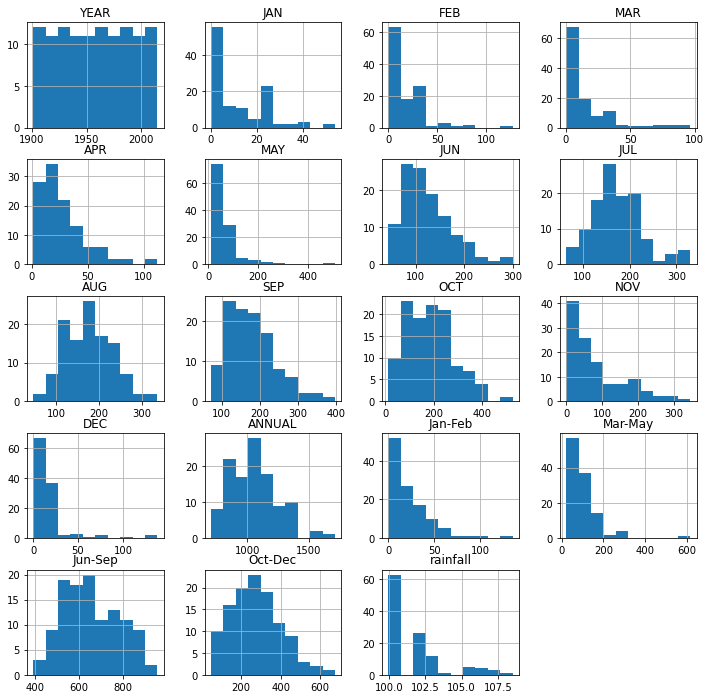

In [13]:
CAP.hist(figsize=(12,12))

In [14]:
data = np.asarray(CAP[['JAN','FEB', 'MAR', 'APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']])
print(np.shape(data))
X = data[:,0:12]
y = data[:,12]

(115, 13)


In [15]:
data = np.asarray(CAP[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])
print(np.shape(data))

(115, 12)


In [16]:
coastal_andhra_df = df[df['DIVISION'] == 'COASTAL ANDHRA PRADESH']
coastal_andhra_df.drop(columns=['DIVISION'], inplace=True)
coastal_andhra_df

C:\Users\HP\AppData\Local\Temp\ipykernel_17752\2248569035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coastal_andhra_df.drop(columns=['DIVISION'], inplace=True)


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,rainfall
3082,1901,18.800000,80.900000,7.2,28.7,68.7,77.7,113.0,133.7,125.3,173.4,164.800000,1.500000,993.8,99.7,104.6,449.7,339.8,99.989938
3083,1902,2.000000,25.860813,2.8,23.9,37.6,72.6,144.5,236.1,204.5,262.0,50.400000,27.100000,1063.6,2.0,64.4,657.7,339.5,102.422040
3084,1903,0.800000,13.300000,0.2,6.2,73.4,154.0,248.6,258.0,216.5,159.1,173.900000,12.100000,1316.2,14.2,79.8,877.1,345.1,99.992402
3085,1904,1.300000,25.860813,5.4,3.0,136.3,107.8,120.2,117.7,116.8,240.9,47.380023,10.700000,860.2,1.3,144.7,462.6,251.6,108.502771
3086,1905,1.100000,16.700000,68.0,37.0,68.8,84.4,64.6,210.8,170.2,66.0,7.400000,24.047983,795.2,17.8,173.8,530.1,73.4,102.998992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,2011,22.246718,17.900000,0.9,62.3,67.9,86.8,196.0,215.8,129.7,74.6,4.900000,5.000000,861.9,17.9,131.2,628.4,84.4,102.569523
3193,2012,37.600000,25.860813,2.7,24.0,39.3,95.4,221.9,221.2,246.5,140.0,289.700000,24.047983,1318.4,37.6,66.1,785.0,429.7,103.777973
3194,2013,2.000000,29.600000,0.2,48.0,28.2,127.5,162.4,123.1,132.0,411.5,53.100000,2.800000,1120.5,31.7,76.4,545.0,467.4,99.991075
3195,2014,0.400000,1.200000,9.1,6.0,112.9,45.7,151.8,177.8,144.5,195.6,23.700000,6.400000,874.9,1.5,128.0,519.7,225.7,100.022860


In [17]:
from sklearn.model_selection import train_test_split

# # Filter the data for Coastal Andhra Pradesh
# coastal_andhra_df = df[df['DIVISION'] == 'COASTAL ANDHRA PRADESH']

# Set 'Rainfall' as the target variable
target_column = 'rainfall'

# Split the filtered data into features (X) and target variable (y)
X = coastal_andhra_df.drop(target_column, axis=1)  # Features are all columns except the target variable
y = coastal_andhra_df[target_column]  # Target variable is 'Rainfall'

# Split the filtered data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
3113,1932,22.246718,53.2,0.1,20.8,47.2,79.6,203.3,122.3,147.8,117.2,180.000000,0.100000,971.5,53.2,68.0,553.0,297.2
3149,1968,11.300000,11.8,13.6,42.9,28.0,70.8,170.2,45.5,164.8,197.2,78.100000,4.800000,838.9,23.1,84.4,451.3,280.0
3175,1994,7.200000,17.4,3.1,30.6,49.2,62.5,218.3,156.5,137.0,257.6,213.400000,2.100000,1155.1,24.6,83.0,574.4,473.1
3191,2010,21.800000,2.3,4.4,14.8,162.0,156.1,318.9,248.6,230.5,204.0,210.900000,138.200000,1712.4,24.1,181.2,954.0,553.1
3104,1923,0.200000,58.3,13.5,14.9,39.1,44.3,128.8,53.4,260.6,267.5,245.600000,0.100000,1126.4,58.5,67.5,487.1,513.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,2007,22.246718,5.1,0.1,8.5,13.0,300.1,141.0,164.4,287.1,167.7,11.900000,0.500000,1099.2,5.1,21.6,892.5,180.0
3096,1915,21.100000,17.9,53.3,44.8,63.5,177.3,134.8,226.5,170.5,228.8,208.800000,24.047983,1347.4,39.0,161.7,709.1,437.7
3174,1993,2.200000,9.8,16.6,26.6,71.7,73.2,166.2,99.3,172.9,196.2,17.500000,17.500000,869.7,12.0,114.9,511.7,231.2
3133,1952,22.246718,17.4,12.2,28.8,94.2,87.4,130.1,128.8,130.2,251.8,47.380023,35.700000,916.7,17.4,135.2,476.5,287.5


In [19]:
y_train

3113    102.300228
3149    100.011920
3175     99.982685
3191    100.005840
3104     99.991122
           ...    
3188    102.042096
3096    101.777348
3174    100.000000
3133    107.584460
3184    100.018235
Name: rainfall, Length: 92, dtype: float64

### Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Instantiate the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.1570850915095618


In [22]:
from sklearn.metrics import mean_squared_error

# Predictions on training data
y_train_pred = model.predict(X_train)

# Predictions on test data
y_test_pred = model.predict(X_test)

# Calculate MSE for training data
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate MSE for test data
mse_test = mean_squared_error(y_test, y_test_pred)

print("Mean Squared Error (MSE) for training data:", mse_train)
print("Mean Squared Error (MSE) for test data:", mse_test)


Mean Squared Error (MSE) for training data: 0.08631537928080743
Mean Squared Error (MSE) for test data: 0.1570850915095618


In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# R-squared (R2)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Evaluation Metrics for Training Data:")
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("MAE:", mae_train)
print("R-squared:", r2_train)
print()
print("Evaluation Metrics for Test Data:")
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("MAE:", mae_test)
print("R-squared:", r2_test)

Evaluation Metrics for Training Data:
MSE: 0.08631537928080743
RMSE: 0.29379479110564133
MAE: 0.21428240177398628
R-squared: 0.9797572806733442

Evaluation Metrics for Test Data:
MSE: 0.1570850915095618
RMSE: 0.3963396163766143
MAE: 0.2735410703241582
R-squared: 0.9663381147093997


In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Random Forest regressor with desired hyperparameters
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate the model
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)

print("Random Forest Train MSE:", train_mse_rf)
print("Random Forest Test MSE:", test_mse_rf)

# Calculate other evaluation metrics
# You can reuse the code provided earlier for MAE, RMSE, and R2

# Calculate Mean Absolute Error (MAE) for training and test data
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("Train MAE:", train_mae)
print("Test MAE:", test_mae)

# Calculate Root Mean Squared Error (RMSE) for training and test data
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

# Calculate R-squared (R2) for training and test data
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)

Random Forest Train MSE: 0.48089699600970726
Random Forest Test MSE: 3.525190659773099
Train MAE: 0.21428240177398628
Test MAE: 0.2735410703241582
Train RMSE: 0.29379479110564133
Test RMSE: 0.3963396163766143
Train R-squared: 0.9797572806733442
Test R-squared: 0.9663381147093997
